Geo Spatial Analysis to show  Percent Electric vehicle by Tenneessee Counties  Using Choropleth

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
counties = gpd.read_file('../data/county/tncounty.shp')

In [3]:
counties

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774...."
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ..."
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ..."
...,...,...,...,...,...,...
90,91,McNairy,47109,1.563586e+10,566369.132062,"POLYGON ((1137985.762 344601.643, 1139350.519 ..."
91,92,Franklin,47051,1.605093e+10,621176.096919,"POLYGON ((1873015.265 239618.144, 1872957.848 ..."
92,93,Bradley,47011,9.241234e+09,457372.233476,"POLYGON ((2274954.438 239788.911, 2275552.803 ..."
93,94,Marion,47115,1.428734e+10,529431.591556,"POLYGON ((2126056.390 236919.771, 2122873.509 ..."


In [4]:
counties.NAME.value_counts()

NAME
Chester     1
Wayne       1
Tipton      1
Hamilton    1
Stewart     1
           ..
McNairy     1
Franklin    1
Bradley     1
Marion      1
Polk        1
Name: count, Length: 95, dtype: int64

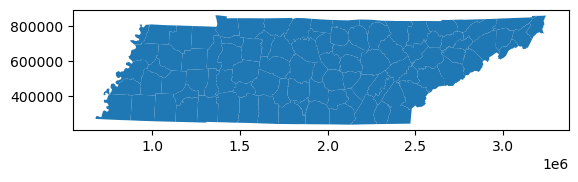

In [5]:
counties.plot();

In [6]:
ev = pd.read_csv('../data/Electric_Vehicle_Population_Size_History_By_County.csv')

In [7]:
ev

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,May 31 2020,Washoe,NV,Passenger,1,0,1,111,112,0.89
1,June 30 2024,Albemarle,VA,Passenger,1,0,1,12,13,7.69
2,April 30 2021,Thurston,WA,Passenger,1494,833,2327,197765,200092,1.16
3,November 30 2019,Okanogan,WA,Passenger,27,30,57,26219,26276,0.22
4,August 31 2019,San Diego,CA,Passenger,11,4,15,2752,2767,0.54
...,...,...,...,...,...,...,...,...,...,...
22151,April 30 2020,Juneau,AK,Passenger,0,2,2,33,35,5.71
22152,May 31 2024,Marion,IA,Passenger,1,0,1,0,1,100.00
22153,December 31 2018,Grays Harbor,WA,Truck,0,0,0,20352,20352,0.00
22154,July 31 2017,San Juan,WA,Truck,0,0,0,5545,5545,0.00


In [8]:
ev.County.value_counts()

County
Douglas       303
Montgomery    302
Jefferson     274
Clark         270
Franklin      227
             ... 
Durham          2
Shoshone        2
Houston         2
Hood River      1
Union           1
Name: count, Length: 320, dtype: int64

What is the Electric Vehicle population In Tennessee Counties? And use Geo Spatial
Analysis to show your Visualizations Using Choropleth

In [9]:
tn_counties = pd.merge(left = counties, right = ev, 
                    left_on = 'NAME', right_on = 'County',how='left')
tn_counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",May 31 2017,Wayne,MI,Passenger,0.0,1.0,1.0,71.0,72.0,1.39
2,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",June 30 2023,Wayne,MI,Passenger,0.0,1.0,1.0,41.0,42.0,2.38
3,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",July 31 2023,Wayne,MI,Passenger,0.0,1.0,1.0,42.0,43.0,2.33
4,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",March 31 2023,Wayne,MI,Passenger,0.0,1.0,1.0,38.0,39.0,2.56


In [10]:
tn_counties.shape

(3013, 16)

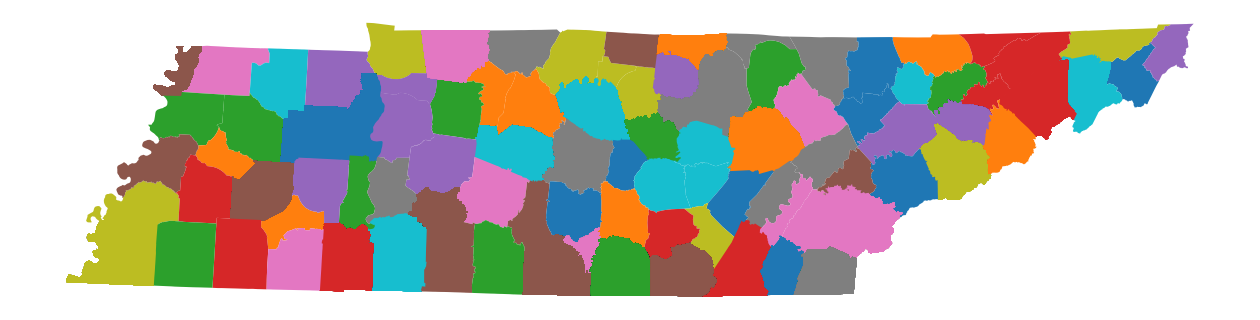

In [11]:
fig, ax = plt.subplots(figsize=(16,4))
tn_counties.plot(column = 'NAME', 
              ax = ax)
ax.axis('off');

In [63]:
tn_counties[["Percent Electric Vehicles"]] = tn_counties[["Percent Electric Vehicles"]].fillna(0)

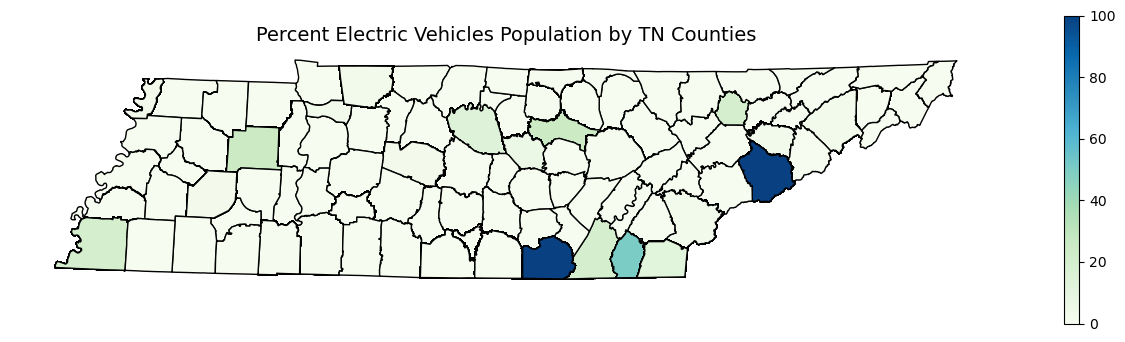

In [64]:
fig, ax = plt.subplots(figsize=(16,4))
tn_counties.plot(column = 'Percent Electric Vehicles', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Percent Electric Vehicles Population by TN Counties', fontsize = 14)
ax.axis('off');

fig, ax = plt.subplots(figsize=(16,4))
tn_counties.plot(column = 'NAME', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title(' Electric Vehicles Population In TN Counties', fontsize = 14)
ax.axis('off');

In [13]:
tn_counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   OBJECTID                                  3013 non-null   int64   
 1   NAME                                      3013 non-null   object  
 2   KEY                                       3013 non-null   object  
 3   SHAPE_AREA                                3013 non-null   float64 
 4   SHAPE_LEN                                 3013 non-null   float64 
 5   geometry                                  3013 non-null   geometry
 6   Date                                      2948 non-null   object  
 7   County                                    2948 non-null   object  
 8   State                                     2948 non-null   object  
 9   Vehicle Primary Use                       2948 non-null   object  
 10  Battery Electric

In [14]:
tn_counties.NAME.value_counts()

NAME
Montgomery    302
Jefferson     274
Franklin      227
Lincoln       203
Lewis         184
             ... 
Lawrence        1
Hawkins         1
Hancock         1
McNairy         1
Fayette         1
Name: count, Length: 95, dtype: int64

df[["Fee","Duration"]] = df[["Fee","Duration"]].fillna(0)

In [15]:
tn_counties[["Percent Electric Vehicles"]] = tn_counties[["Percent Electric Vehicles"]].fillna(0)

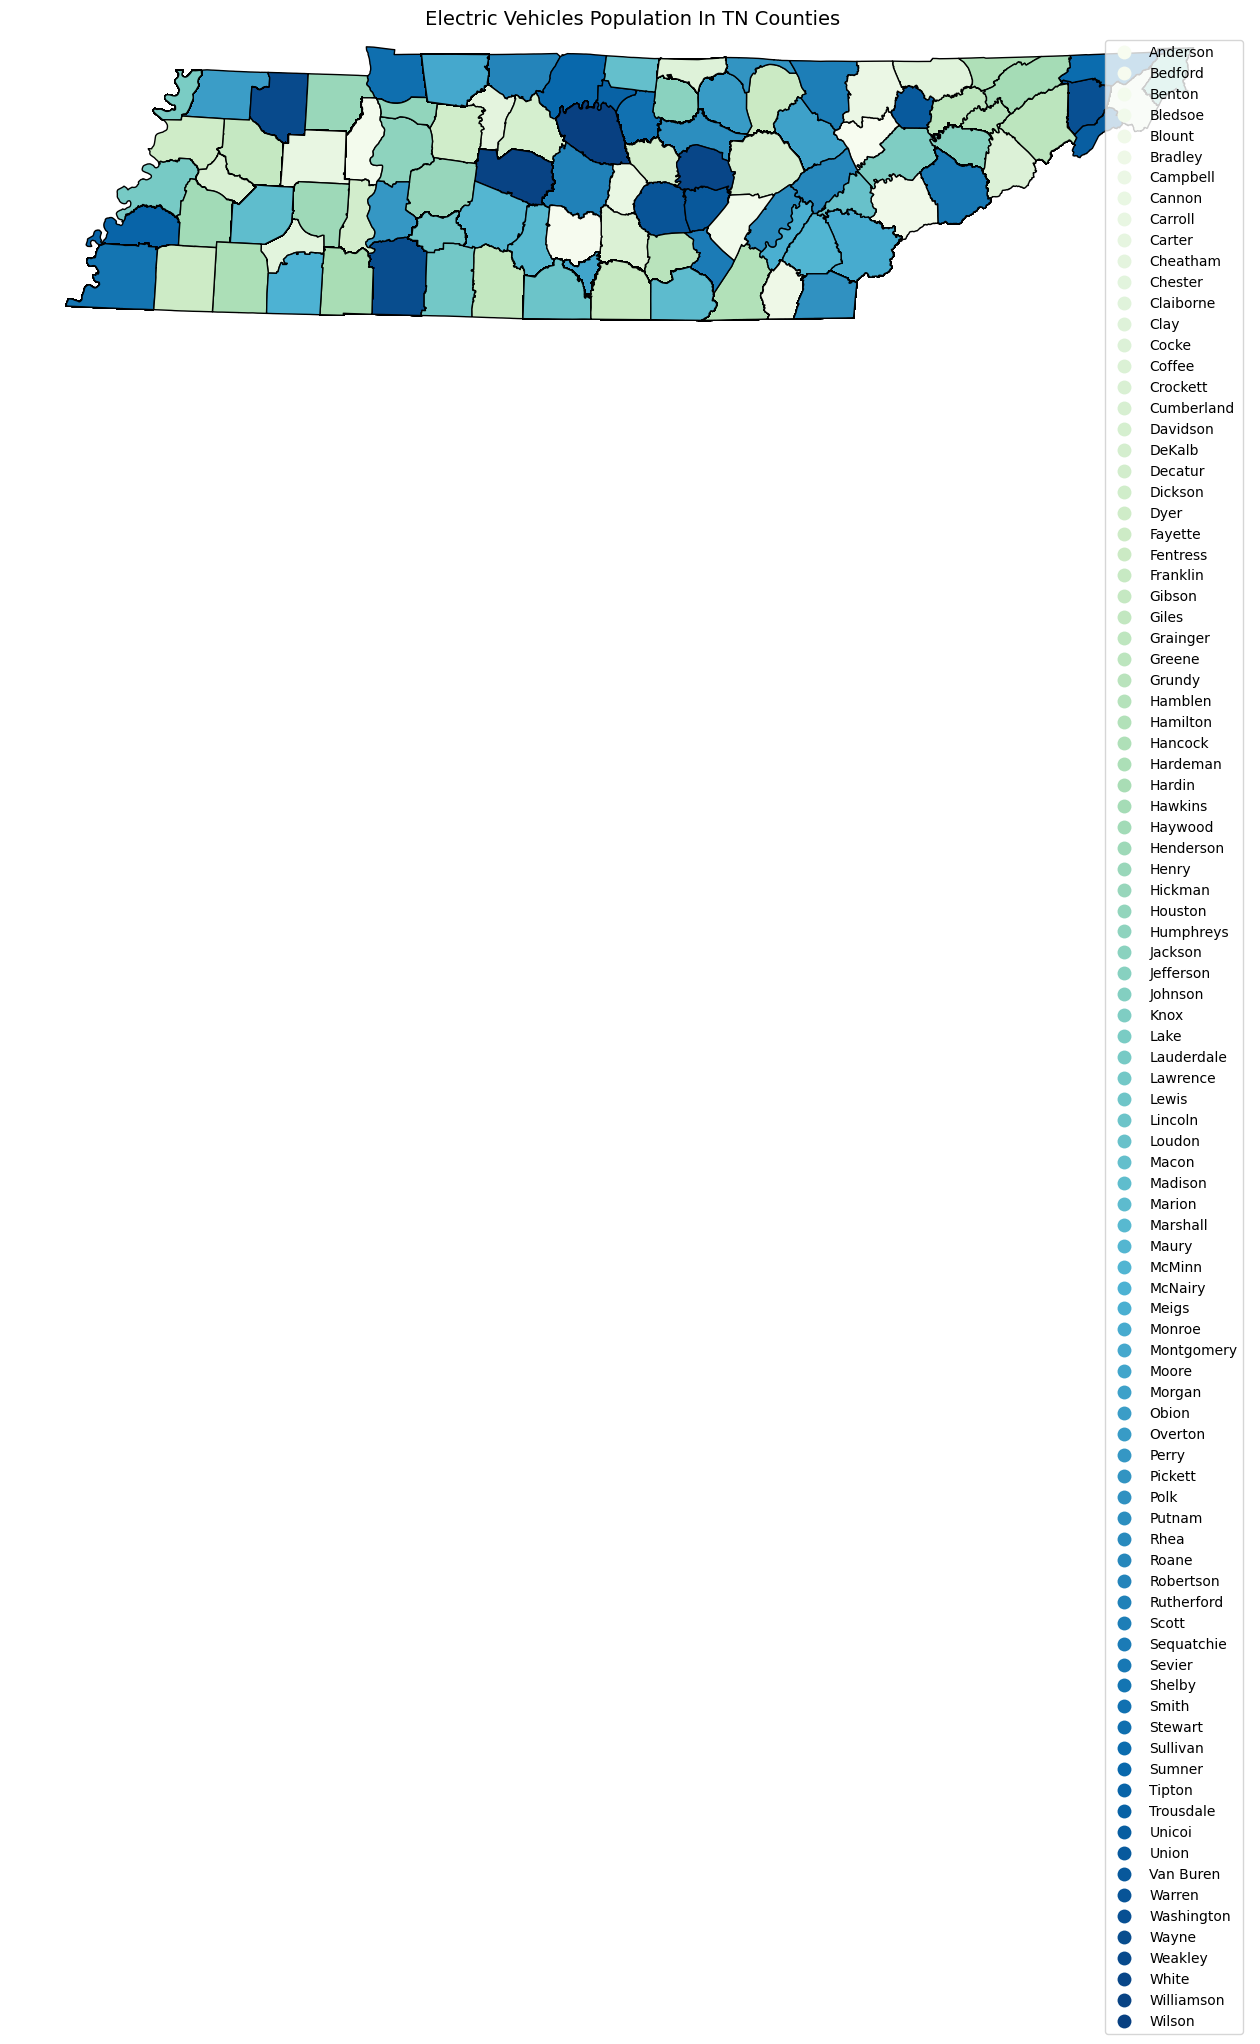

In [16]:
fig, ax = plt.subplots(figsize=(16,4))
tn_counties.plot(column = 'NAME', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title(' Electric Vehicles Population In TN Counties', fontsize = 14)
ax.axis('off');

In [17]:
tn_counties.NAME.value_counts()

NAME
Montgomery    302
Jefferson     274
Franklin      227
Lincoln       203
Lewis         184
             ... 
Lawrence        1
Hawkins         1
Hancock         1
McNairy         1
Fayette         1
Name: count, Length: 95, dtype: int64

In [18]:
tn_counties[["Electric Vehicle (EV) Total"]] = tn_counties[["Electric Vehicle (EV) Total"]].fillna(0)

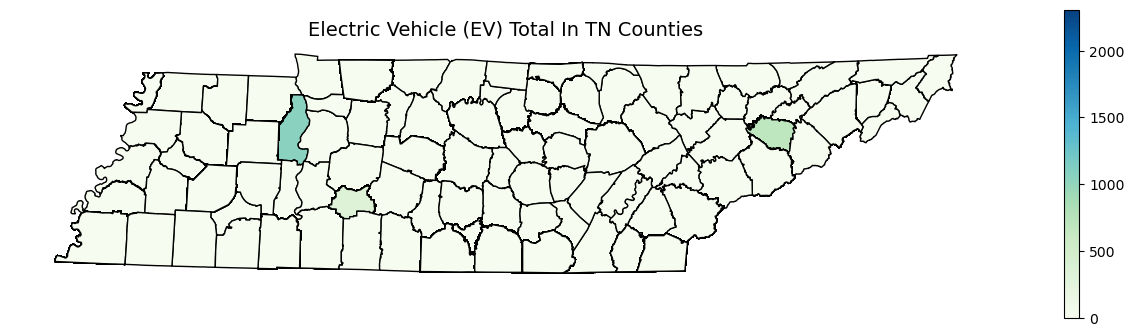

In [19]:
fig, ax = plt.subplots(figsize=(16,4))
tn_counties.plot(column = 'Electric Vehicle (EV) Total', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Electric Vehicle (EV) Total In TN Counties', fontsize = 14)
ax.axis('off');

What is the Electric Vehicle population by each State? and Use Geo Spatial Analysis to
show your Visualizations Using Choropleth.

In [48]:
states = gpd.read_file('../data/States_shapefile.geojson')   
states.head()

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


In [49]:
states.shape

(51, 7)

In [50]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         51 non-null     int64   
 1   Program     51 non-null     object  
 2   State_Code  51 non-null     object  
 3   State_Name  51 non-null     object  
 4   Flowing_St  51 non-null     object  
 5   FID_1       51 non-null     int64   
 6   geometry    51 non-null     geometry
dtypes: geometry(1), int64(2), object(4)
memory usage: 2.9+ KB


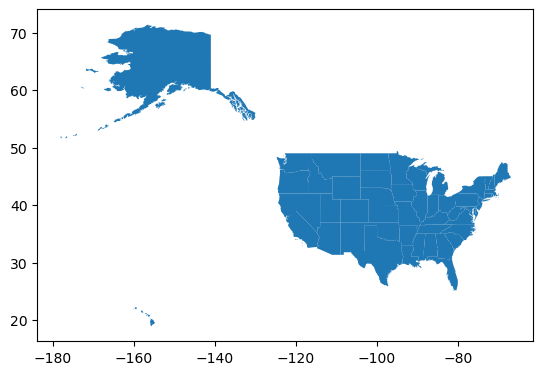

In [51]:
states.plot();

In [53]:
usall = pd.merge(left = states, right = ev, 
                    left_on = 'State_Code', right_on = 'State',how='left')
usall.head(2)

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",March 31 2024,Shelby,AL,Passenger,1.0,0.0,1.0,4.0,5.0,20.00
1,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",November 30 2018,Dale,AL,Passenger,0.0,1.0,1.0,54.0,55.0,1.82


In [54]:
usall.shape

(22022, 17)

In [57]:
usall.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22022 entries, 0 to 22021
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   FID                                       22022 non-null  int64   
 1   Program                                   22022 non-null  object  
 2   State_Code                                22022 non-null  object  
 3   State_Name                                22022 non-null  object  
 4   Flowing_St                                22022 non-null  object  
 5   FID_1                                     22022 non-null  int64   
 6   geometry                                  22022 non-null  geometry
 7   Date                                      22020 non-null  object  
 8   County                                    22020 non-null  object  
 9   State                                     22020 non-null  object  
 10  Vehicle Primar

fig, ax = plt.subplots(figsize=(16,4))
usall.plot(column = 'Percent Electric Vehicles', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Percent Electric Vehicles Population by US States', fontsize = 14)
ax.axis('off');

usall[["Total Vehicles"]] = usall[["Total Vehicles"]].fillna(0)

fig, ax = plt.subplots(figsize=(16,4))
usall.plot(column = 'Electric Vehicle (EV) Total', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title(' Electric Vehicles Population In us states', fontsize = 14)
ax.axis('off');